In [1]:
import os
import sys

seed = 0
os.environ['PYTHONHASSEED'] = str(seed)

In [2]:
import numpy as np
import pandas as pd
import time
import random

from tensorflow.random import set_seed

In [5]:
# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
from src.data_reader import DataReader
from src.dataset_exploration import unit_cycle_info
from src.filtering import signal_smoothing
from src.metrics import compute_evaluation_metrics
from src.model_evaluation import evaluate_mlp, evaluate_mlp_multiple_splits
from src.plotting import plot_loss_curves, plot_signal_filtering
from src.serialization import load_object
from src.training import train_evaluate_mlp, MLPConfigParams, train_validation_split_by_unit

In [7]:
# Set seed
random.seed(seed)
np.random.seed(seed)
set_seed(seed)

In [8]:
# Set input and output paths
filename = '../data/N-CMAPSS_DS02-006.h5'
output_path = '../results/experiment_set_15_corrected'

if not os.path.exists(output_path):
    os.makedirs(output_path)

In [9]:
data_reader = DataReader()

start_time = time.process_time()  
data_reader.load_dataset(filename, load_train=True, load_test=True)
print("Operation time (sec): " , (time.process_time() - start_time))

if data_reader.train_set is not None:
    print("Train set shape: " + str(data_reader.train_set.shape))
    
if data_reader.test_set is not None:   
    print("Test set shape: " + str(data_reader.test_set.shape))

Operation time (sec):  4.46875
Train set shape: (5263447, 47)
Test set shape: (1253743, 47)


In [10]:
train_set = data_reader.train_set

selected_columns = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
selected_columns_with_unit = selected_columns + ['unit']
train_set = train_set[selected_columns_with_unit + ['RUL']]

train_set = train_set.astype(np.float32)

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.01\split_0\scaler.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4864      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 235,137
Trainable params: 235,137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
6228/6228

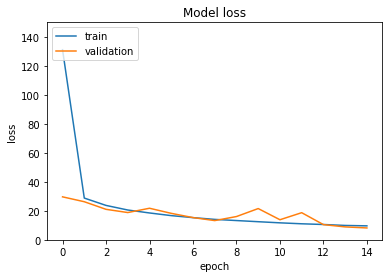

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.01\split_0\history_0.pkl
Test set:
MSE: 76.27
RMSE: 8.73
CMAPSS score: 2.04

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.01\split_1\scaler.pkl
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               4864      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total

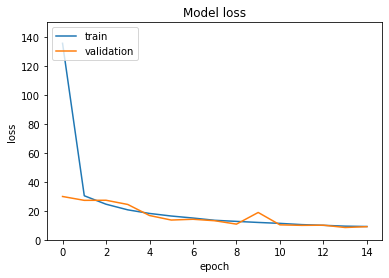

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.01\split_1\history_1.pkl
Test set:
MSE: 79.36
RMSE: 8.91
CMAPSS score: 2.05

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.01\split_2\scaler.pkl
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total

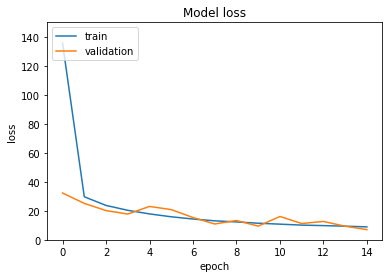

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.01\split_2\history_2.pkl
Test set:
MSE: 81.32
RMSE: 9.02
CMAPSS score: 2.10

MSE: mean = 78.98   stddev = 2.08
RMSE: mean = 8.89   stddev = 0.12
CMAPSS: mean = 2.07   stddev = 0.03
Saved object to file: ../results/experiment_set_15_corrected\results_es_0.05\split_0\scaler.pkl
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                32832     
_________________________________

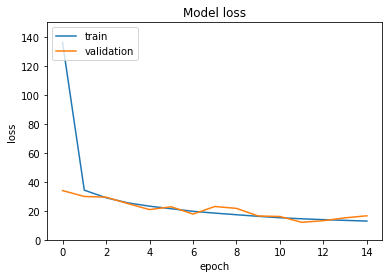

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.05\split_0\history_0.pkl
Test set:
MSE: 76.78
RMSE: 8.76
CMAPSS score: 2.06

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.05\split_1\scaler.pkl
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total

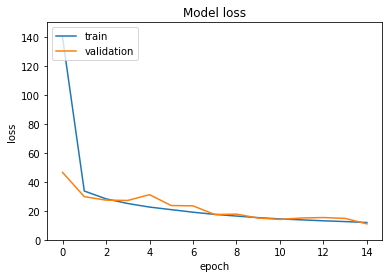

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.05\split_1\history_1.pkl
Test set:
MSE: 77.40
RMSE: 8.80
CMAPSS score: 2.05

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.05\split_2\scaler.pkl
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_28 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total

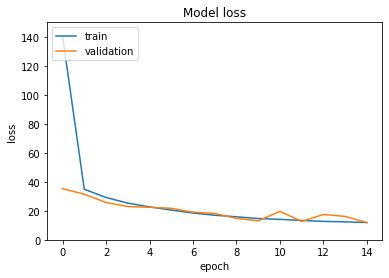

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.05\split_2\history_2.pkl
Test set:
MSE: 77.75
RMSE: 8.82
CMAPSS score: 2.07

MSE: mean = 77.31   stddev = 0.40
RMSE: mean = 8.79   stddev = 0.02
CMAPSS: mean = 2.06   stddev = 0.01
Saved object to file: ../results/experiment_set_15_corrected\results_es_0.1\split_0\scaler.pkl
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_33 (Dense)             (None, 64)                32832     
__________________________________

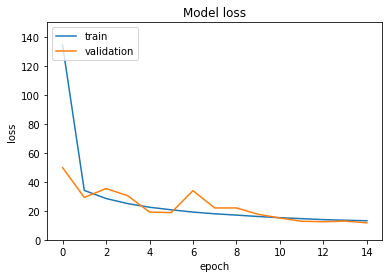

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.1\split_0\history_0.pkl
Test set:
MSE: 76.75
RMSE: 8.76
CMAPSS score: 2.06

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.1\split_1\scaler.pkl
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_36 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_37 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_38 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total p

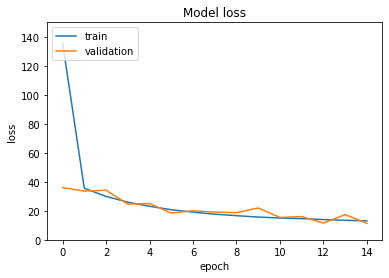

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.1\split_1\history_1.pkl
Test set:
MSE: 76.45
RMSE: 8.74
CMAPSS score: 2.07

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.1\split_2\scaler.pkl
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_42 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_43 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 65        
Total p

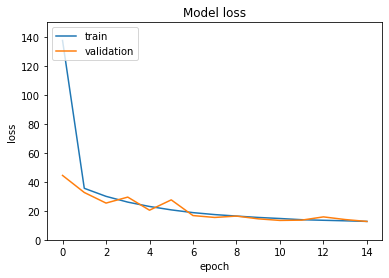

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.1\split_2\history_2.pkl
Test set:
MSE: 77.92
RMSE: 8.83
CMAPSS score: 2.06

MSE: mean = 77.04   stddev = 0.63
RMSE: mean = 8.78   stddev = 0.04
CMAPSS: mean = 2.06   stddev = 0.01
Saved object to file: ../results/experiment_set_15_corrected\results_es_0.2\split_0\scaler.pkl
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_46 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_47 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_48 (Dense)             (None, 64)                32832     
___________________________________

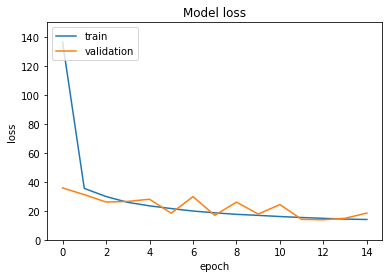

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.2\split_0\history_0.pkl
Test set:
MSE: 76.71
RMSE: 8.76
CMAPSS score: 2.06

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.2\split_1\scaler.pkl
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_51 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_52 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_53 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 65        
Total 

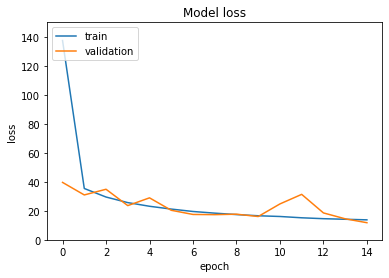

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.2\split_1\history_1.pkl
Test set:
MSE: 75.34
RMSE: 8.68
CMAPSS score: 2.06

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.2\split_2\scaler.pkl
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_56 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_57 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_58 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 65        
Total 

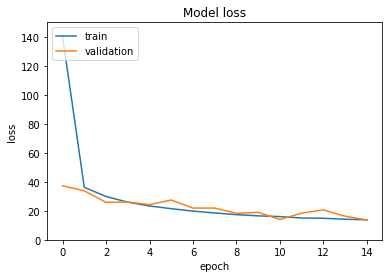

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.2\split_2\history_2.pkl
Test set:
MSE: 77.44
RMSE: 8.80
CMAPSS score: 2.06

MSE: mean = 76.50   stddev = 0.87
RMSE: mean = 8.75   stddev = 0.05
CMAPSS: mean = 2.06   stddev = 0.00
Saved object to file: ../results/experiment_set_15_corrected\results_es_0.3\split_0\scaler.pkl
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_61 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_62 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_63 (Dense)             (None, 64)                32832     
__________________________________

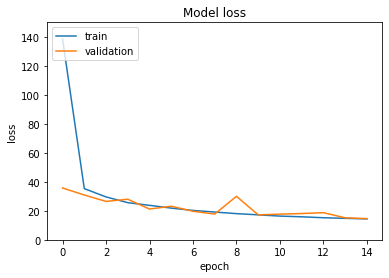

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.3\split_0\history_0.pkl
Test set:
MSE: 76.88
RMSE: 8.77
CMAPSS score: 2.09

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.3\split_1\scaler.pkl
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_66 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_67 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_68 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 65        
Total 

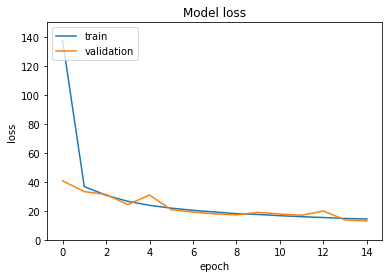

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.3\split_1\history_1.pkl
Test set:
MSE: 76.75
RMSE: 8.76
CMAPSS score: 2.07

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.3\split_2\scaler.pkl
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_71 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_72 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_73 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 65        
Total 

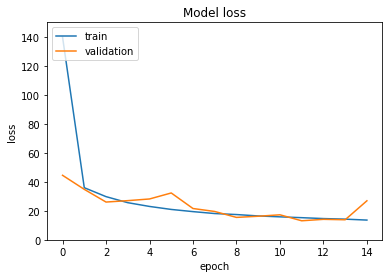

Saved object to file: ../results/experiment_set_15_corrected\results_es_0.3\split_2\history_2.pkl
Test set:
MSE: 75.67
RMSE: 8.70
CMAPSS score: 2.05

MSE: mean = 76.43   stddev = 0.54
RMSE: mean = 8.74   stddev = 0.03
CMAPSS: mean = 2.07   stddev = 0.01
Saved object to file: ../results/experiment_set_15_corrected\results_ma_5\split_0\scaler.pkl
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_76 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_77 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_78 (Dense)             (None, 64)                32832     
____________________________________

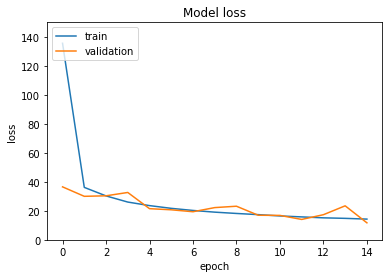

Saved object to file: ../results/experiment_set_15_corrected\results_ma_5\split_0\history_0.pkl
Test set:
MSE: 76.25
RMSE: 8.73
CMAPSS score: 2.06

Saved object to file: ../results/experiment_set_15_corrected\results_ma_5\split_1\scaler.pkl
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_81 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_82 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_83 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 65        
Total para

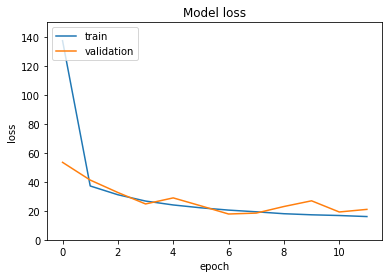

Saved object to file: ../results/experiment_set_15_corrected\results_ma_5\split_1\history_1.pkl
Test set:
MSE: 72.86
RMSE: 8.54
CMAPSS score: 2.05

Saved object to file: ../results/experiment_set_15_corrected\results_ma_5\split_2\scaler.pkl
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_86 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_87 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_88 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 65        
Total para

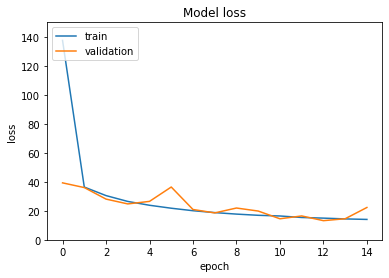

Saved object to file: ../results/experiment_set_15_corrected\results_ma_5\split_2\history_2.pkl
Test set:
MSE: 77.60
RMSE: 8.81
CMAPSS score: 2.08

MSE: mean = 75.57   stddev = 1.99
RMSE: mean = 8.69   stddev = 0.11
CMAPSS: mean = 2.06   stddev = 0.01
Saved object to file: ../results/experiment_set_15_corrected\results_ma_10\split_0\scaler.pkl
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_91 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_92 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_93 (Dense)             (None, 64)                32832     
_____________________________________

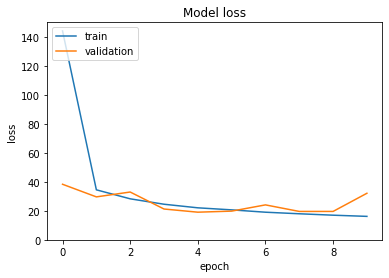

Saved object to file: ../results/experiment_set_15_corrected\results_ma_10\split_0\history_0.pkl
Test set:
MSE: 67.62
RMSE: 8.22
CMAPSS score: 1.97

Saved object to file: ../results/experiment_set_15_corrected\results_ma_10\split_1\scaler.pkl
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_96 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_97 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_98 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 65        
Total pa

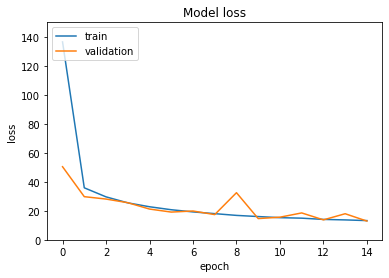

Saved object to file: ../results/experiment_set_15_corrected\results_ma_10\split_1\history_1.pkl
Test set:
MSE: 75.53
RMSE: 8.69
CMAPSS score: 2.08

Saved object to file: ../results/experiment_set_15_corrected\results_ma_10\split_2\scaler.pkl
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 256)               4864      
_________________________________________________________________
dense_101 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_102 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_103 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 65        
Total pa

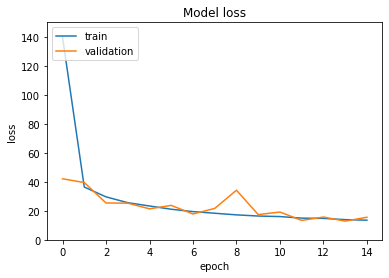

Saved object to file: ../results/experiment_set_15_corrected\results_ma_10\split_2\history_2.pkl
Test set:
MSE: 75.21
RMSE: 8.67
CMAPSS score: 2.05

MSE: mean = 72.79   stddev = 3.66
RMSE: mean = 8.53   stddev = 0.22
CMAPSS: mean = 2.03   stddev = 0.05
Saved object to file: ../results/experiment_set_15_corrected\results_ma_15\split_0\scaler.pkl
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 256)               4864      
_________________________________________________________________
dense_106 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_107 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_108 (Dense)            (None, 64)                32832     
____________________________________

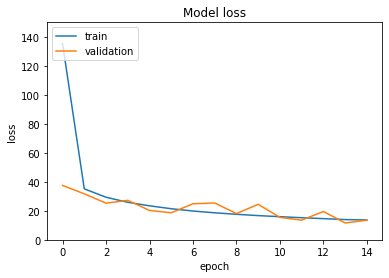

Saved object to file: ../results/experiment_set_15_corrected\results_ma_15\split_0\history_0.pkl
Test set:
MSE: 79.56
RMSE: 8.92
CMAPSS score: 2.08

Saved object to file: ../results/experiment_set_15_corrected\results_ma_15\split_1\scaler.pkl
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 256)               4864      
_________________________________________________________________
dense_111 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_112 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_113 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 65        
Total pa

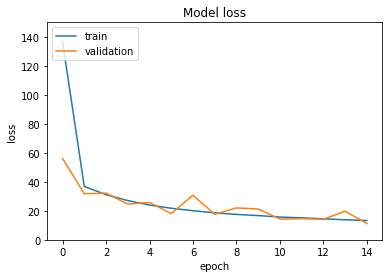

Saved object to file: ../results/experiment_set_15_corrected\results_ma_15\split_1\history_1.pkl
Test set:
MSE: 76.89
RMSE: 8.77
CMAPSS score: 2.06

Saved object to file: ../results/experiment_set_15_corrected\results_ma_15\split_2\scaler.pkl
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 256)               4864      
_________________________________________________________________
dense_116 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_117 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_118 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 65        
Total pa

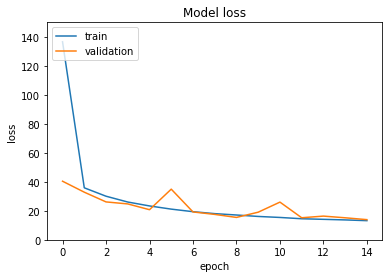

Saved object to file: ../results/experiment_set_15_corrected\results_ma_15\split_2\history_2.pkl
Test set:
MSE: 74.86
RMSE: 8.65
CMAPSS score: 2.06

MSE: mean = 77.11   stddev = 1.92
RMSE: mean = 8.78   stddev = 0.11
CMAPSS: mean = 2.07   stddev = 0.01
Saved object to file: ../results/experiment_set_15_corrected\results_ma_20\split_0\scaler.pkl
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 256)               4864      
_________________________________________________________________
dense_121 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_122 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_123 (Dense)            (None, 64)                32832     
____________________________________

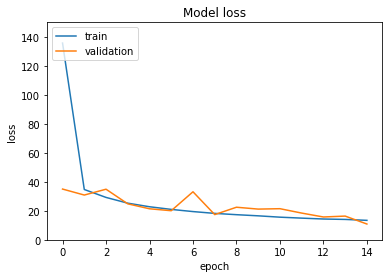

Saved object to file: ../results/experiment_set_15_corrected\results_ma_20\split_0\history_0.pkl
Test set:
MSE: 73.50
RMSE: 8.57
CMAPSS score: 2.06

Saved object to file: ../results/experiment_set_15_corrected\results_ma_20\split_1\scaler.pkl
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 256)               4864      
_________________________________________________________________
dense_126 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_127 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_128 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 65        
Total pa

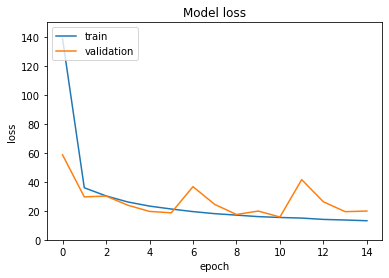

Saved object to file: ../results/experiment_set_15_corrected\results_ma_20\split_1\history_1.pkl
Test set:
MSE: 74.57
RMSE: 8.64
CMAPSS score: 2.10

Saved object to file: ../results/experiment_set_15_corrected\results_ma_20\split_2\scaler.pkl
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            (None, 256)               4864      
_________________________________________________________________
dense_131 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_132 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_133 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_134 (Dense)            (None, 1)                 65        
Total pa

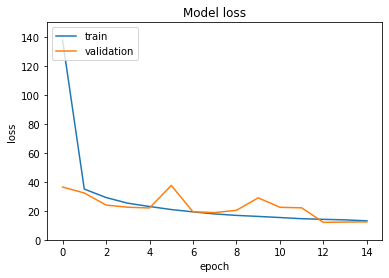

Saved object to file: ../results/experiment_set_15_corrected\results_ma_20\split_2\history_2.pkl
Test set:
MSE: 75.67
RMSE: 8.70
CMAPSS score: 2.03

MSE: mean = 74.58   stddev = 0.88
RMSE: mean = 8.64   stddev = 0.05
CMAPSS: mean = 2.06   stddev = 0.03


In [12]:
###################################################
# Effect of smoothing (experiment set 15 corrected)
###################################################
NUM_TRIALS = 3
EPOCHS = 15
BATCH_SIZE = 512

mlp_params = MLPConfigParams(layer_sizes=[256, 256, 512, 64], activation='tanh', dropout=0)
alpha_vals = [0.01, 0.05, 0.1, 0.2, 0.3]
w_vals = [5, 10, 15, 20]

filter_params = [("es", alpha) for alpha in alpha_vals] + [("ma", w) for w in w_vals]

results_file = os.path.join(output_path, "results_filtering.csv")
with open(results_file, "w") as file:
    file.write("filter_type,filter_param,mse,rmse,cmapss,mse(mean),mse(std),rmse(mean),rmse(std),cmapss(mean),cmapss(std)\n")


for params in filter_params:
    filter_type, filter_param = params
    
    with open(results_file, "a") as file:
        file.write(f"{filter_type},{filter_param},")
    
    results_folder = f"results_{filter_type}_{filter_param}"
    results_path = os.path.join(output_path, results_folder)
    if not os.path.exists(results_path):
        os.makedirs(results_path)
    
    # Smoothing
    train_set_filtered = signal_smoothing(train_set, selected_columns, filter_type, filter_param) 
    
    # Validation split after engine number
    train_split, val_split = train_validation_split_by_unit(train_set_filtered)
    
    x_train_split = train_split[[i for i in list(train_split.columns) if i != 'RUL']]
    x_holdout_split = val_split[[i for i in list(val_split.columns) if i != 'RUL']]
    
    y_train_split = train_split['RUL']
    y_holdout_split = val_split['RUL']
    
    mse_vals, rmse_vals, cmapss_vals = train_evaluate_mlp(
        x_train_split, y_train_split, 
        x_holdout_split, y_holdout_split,
        NUM_TRIALS, 
        mlp_params, 
        results_path, 
        EPOCHS, BATCH_SIZE,
        results_file=results_file)